In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
import seaborn as sns
sns.set()

In [3]:
root_results = "/content/drive/MyDrive/Research/RIT Research (Rahmani)/11 - Beyond-Acc Provider Fairness/Results/providerfairness_results/"
datasets = ['AmazonOffice', 'AmazonToy', 'BookCrossing', 'Epinion', 'Foursquare', 'Gowalla', 'LastFM', 'MovieLens100K']

In [4]:
results_files = []

for dataset in datasets:
  for result_file in glob.glob(root_results + "/" + dataset + "/" + "*.csv"):
      results_files.append(result_file)
print(f"No. of files: {len(results_files)}")

No. of files: 40


In [5]:
all_dfs = []

for result_file in results_files:
    result_df = pd.read_csv(result_file, sep=",")
    # summarizer(df_result=result_df)
    all_dfs.append(result_df)

# concat all of the dataframes
results_df = pd.concat(all_dfs)
# results_df.sort_values(['Dataset', 'Model'], ascending=[True, True])

In [6]:
results_df.columns

Index(['Dataset', 'Model', 'GUser', 'GItem', 'Type', 'User_EPS', 'Item_EPS',
       'ndcg_ALL', 'ndcg_ACT', 'ndcg_INACT', 'Pre_ALL', 'Pre_ACT', 'Pre_INACT',
       'Rec_ALL', 'Rec_ACT', 'Rec_INACT', 'Nov_ALL', 'Nov_ACT', 'Nov_INACT',
       'Div_ALL', 'Div_ACT', 'Div_INACT', 'Cov_ALL', 'Cov_ACT', 'Cov_INACT',
       'Per_ALL', 'Per_ACT', 'Per_INACT', 'UnSer_all', 'UnSer_ac', 'UnSer_iac',
       'Short_Items', 'Rel_Short', 'Long_Items', 'Rel_Long', 'All_Items'],
      dtype='object')

In [7]:
results_df.head()

,Dataset,Model,GUser,GItem,Type,User_EPS,Item_EPS,ndcg_ALL,ndcg_ACT,ndcg_INACT,...,Per_ACT,Per_INACT,UnSer_all,UnSer_ac,UnSer_iac,Short_Items,Rel_Short,Long_Items,Rel_Long,All_Items
0,AmazonOffice,BPR,005%,020%,N,-,-,0.01384,0.04599,0.01196,...,0.00484,0.00048,0.03331,0.00233,0.03098,24480.0,296,0.0,0,24480==24480.0
1,AmazonOffice,BPR,005%,020%,P,-,0.0001000,0.01384,0.04599,0.01196,...,0.00484,0.00048,0.03331,0.00233,0.03098,24480.0,296,0.0,0,24480==24480.0
2,AmazonOffice,BPR,005%,020%,P,-,0.0050000,0.01384,0.04599,0.01196,...,0.00484,0.00048,0.03331,0.00233,0.03098,24480.0,296,0.0,0,24480==24480.0
3,AmazonOffice,BPR,005%,020%,P,-,0.0100000,0.01384,0.04599,0.01196,...,0.00484,0.00048,0.03331,0.00233,0.03098,24480.0,296,0.0,0,24480==24480.0
4,AmazonOffice,BPR,005%,020%,P,-,0.0300000,0.01384,0.04599,0.01196,...,0.00484,0.00048,0.03331,0.00233,0.03098,24480.0,296,0.0,0,24480==24480.0


In [9]:
def compute_best_P_eachline(N_eachline, P_eachline):
  N_elements = [round(N_eachline.ndcg_ALL, 4), round(N_eachline.Pre_ALL, 4), round(N_eachline.Rec_ALL, 4), round(N_eachline.Nov_ALL, 4), round(N_eachline.Div_ALL, 4), round(N_eachline.Cov_ALL / 100, 4), round(N_eachline.Per_ALL, 4), round(1 - N_eachline.UnSer_all, 4)]
  P_elements = [round(P_eachline.ndcg_ALL, 4), round(P_eachline.Pre_ALL, 4), round(P_eachline.Rec_ALL, 4), round(P_eachline.Nov_ALL, 4), round(P_eachline.Div_ALL, 4), round(P_eachline.Cov_ALL / 100, 4), round(P_eachline.Per_ALL, 4), round(1 - P_eachline.UnSer_all, 4)]
  counter = 0
  for N, P in zip(N_elements, P_elements):
    if N < P:
      counter += 1
  return counter


In [10]:
def tabel_producer(results_df, dataset='Gowalla', model="NeuMF", user_eps = '-', item_eps = '-'):
  N_eachline = None
  P_eachline = None
  global element_counter
  global all_final_results_df
  element_counter = 0
  for eachline in results_df.itertuples(index=True):
    if eachline.Dataset == dataset and eachline.Model == model:
      if eachline.Type == 'N' and eachline.User_EPS == '-' and eachline.Item_EPS == '-':
        N_eachline = eachline
        print(f"{model} & N & {round(eachline.ndcg_ALL, 4)} & {round(eachline.Pre_ALL, 4)} & {round(eachline.Rec_ALL, 4)} && {round(eachline.Nov_ALL, 4)} & {round(eachline.Div_ALL, 4)} & {round(eachline.Cov_ALL / 100, 4)} & {round(eachline.Per_ALL, 4)} & {round(1 - eachline.UnSer_all, 4)} && {int(eachline.Short_Items)} & {eachline.Rel_Short} &	{int(eachline.Long_Items)} &	{eachline.Rel_Long} \\\ ")
        all_final_results_df = all_final_results_df.append({'Dataset': dataset, 'Model': model, 'Type': 'N', 'NDCG': round(eachline.ndcg_ALL, 4), 'Pre': round(eachline.Pre_ALL, 4), 'Rec': round(eachline.Rec_ALL, 4), 'Nov': round(eachline.Nov_ALL, 4), 'Div': round(eachline.Div_ALL, 4), 'Cov': round(eachline.Cov_ALL / 100, 4), 'Per': round(eachline.Per_ALL, 4), 'Ser': round(1 - eachline.UnSer_all, 4)}, ignore_index=True)
      elif eachline.Type == 'P' and eachline.User_EPS == '-':
        big_P_counter = compute_best_P_eachline(N_eachline, eachline)
        if big_P_counter >= element_counter:
          P_eachline = eachline
          element_counter = big_P_counter
        if eachline.Item_EPS == '1.0000000':
          print(f"{model} & P & {round(P_eachline.ndcg_ALL, 4)} & {round(P_eachline.Pre_ALL, 4)} & {round(P_eachline.Rec_ALL, 4)} && {round(P_eachline.Nov_ALL, 4)} & {round(P_eachline.Div_ALL, 4)} & {round(P_eachline.Cov_ALL / 100, 4)} & {round(P_eachline.Per_ALL, 4)} & {round(1 - P_eachline.UnSer_all, 4)} && {int(eachline.Short_Items)} & {eachline.Rel_Short} &	{int(eachline.Long_Items)} &	{eachline.Rel_Long} \\\ \hline")
          all_final_results_df = all_final_results_df.append({'Dataset': dataset, 'Model': model, 'Type': 'P', 'NDCG': round(eachline.ndcg_ALL, 4), 'Pre': round(eachline.Pre_ALL, 4), 'Rec': round(eachline.Rec_ALL, 4), 'Nov': round(eachline.Nov_ALL, 4), 'Div': round(eachline.Div_ALL, 4), 'Cov': round(eachline.Cov_ALL / 100, 4), 'Per': round(eachline.Per_ALL, 4), 'Ser': round(1 - eachline.UnSer_all, 4)}, ignore_index=True)

In [11]:
element_counter = None
all_final_results_df = pd.DataFrame(columns=['Dataset', 'Model', 'Type', 'NDCG', 'Pre', 'Rec', 'Nov', 'Div', 'Cov', 'Per', 'Ser'])
for dataset in datasets:
  print("> {}".format(dataset))
  for model in ['PF', 'WMF', 'NeuMF', 'VAECF']:
    tabel_producer(results_df=results_df, dataset=dataset, model=model)

> AmazonOffice
PF & N & 0.0094 & 0.009 & 0.0261 && 6.1434 & 0.9655 & 0.7103 & 0.9747 & 0.9756 && 17069 & 3877 &	7411 &	1881 \\ 
PF & P & 0.0068 & 0.0065 & 0.0188 && 6.8388 & 0.9763 & 0.7417 & 0.9771 & 0.9814 && 5874 & 3553 &	18606 &	2146 \\ \hline
WMF & N & 0.0077 & 0.0082 & 0.0228 && 6.4316 & 0.9682 & 0.8934 & 0.9687 & 0.9764 && 16580 & 3744 &	7900 &	1985 \\ 
WMF & P & 0.0074 & 0.0078 & 0.0232 && 6.5837 & 0.9704 & 0.9097 & 0.9722 & 0.9771 && 6330 & 3231 &	18150 &	2352 \\ \hline
NeuMF & N & 0.0144 & 0.0138 & 0.0367 && 4.7082 & 0.9153 & 0.0464 & 0.5811 & 0.9658 && 24480 & 1465 &	0 &	0 \\ 
NeuMF & P & 0.0144 & 0.0138 & 0.0367 && 4.7082 & 0.9153 & 0.0464 & 0.5811 & 0.9658 && 24480 & 1465 &	0 &	0 \\ \hline
VAECF & N & 0.0176 & 0.0164 & 0.0441 && 5.5704 & 0.9419 & 0.2169 & 0.917 & 0.9662 && 19151 & 3063 &	5329 &	411 \\ 
VAECF & P & 0.017 & 0.0157 & 0.0434 && 5.6913 & 0.9435 & 0.2282 & 0.9191 & 0.967 && 16403 & 2978 &	8077 &	527 \\ \hline
> AmazonToy
PF & N & 0.0085 & 0.008 & 0.027 && 6.8764

<ipython-input-10-c03ba2dc148d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_final_results_df = all_final_results_df.append({'Dataset': dataset, 'Model': model, 'Type': 'N', 'NDCG': round(eachline.ndcg_ALL, 4), 'Pre': round(eachline.Pre_ALL, 4), 'Rec': round(eachline.Rec_ALL, 4), 'Nov': round(eachline.Nov_ALL, 4), 'Div': round(eachline.Div_ALL, 4), 'Cov': round(eachline.Cov_ALL / 100, 4), 'Per': round(eachline.Per_ALL, 4), 'Ser': round(1 - eachline.UnSer_all, 4)}, ignore_index=True)
<ipython-input-10-c03ba2dc148d>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_final_results_df = all_final_results_df.append({'Dataset': dataset, 'Model': model, 'Type': 'P', 'NDCG': round(eachline.ndcg_ALL, 4), 'Pre': round(eachline.Pre_ALL, 4), 'Rec': round(eachline.Rec_ALL, 4), 'Nov': round(eachline.Nov_ALL, 4), 

NeuMF & N & 0.0563 & 0.0528 & 0.0536 && 3.3409 & 0.8127 & 0.1463 & 0.8815 & 0.8649 && 10447 & 3451 &	853 &	577 \\ 
NeuMF & P & 0.0509 & 0.0485 & 0.047 && 3.6512 & 0.8093 & 0.1615 & 0.8901 & 0.8657 && 7361 & 3309 &	3939 &	877 \\ \hline
VAECF & N & 0.0652 & 0.0625 & 0.0673 && 3.8219 & 0.8092 & 0.4079 & 0.9543 & 0.8579 && 8025 & 4360 &	3275 &	2724 \\ 
VAECF & P & 0.0569 & 0.0548 & 0.056 && 4.3186 & 0.8145 & 0.4407 & 0.9552 & 0.8682 && 3299 & 3739 &	8001 &	3304 \\ \hline
> LastFM
PF & N & 0.0372 & 0.035 & 0.0469 && 5.0905 & 0.9201 & 0.6682 & 0.9775 & 0.9213 && 12480 & 6978 &	5490 &	2967 \\ 
PF & P & 0.0371 & 0.035 & 0.047 && 5.1089 & 0.9206 & 0.6709 & 0.9779 & 0.9215 && 10724 & 6939 &	7246 &	3133 \\ \hline
WMF & N & 0.0319 & 0.0301 & 0.0434 && 5.5358 & 0.9294 & 0.7804 & 0.9723 & 0.9257 && 8000 & 6267 &	9970 &	3272 \\ 
WMF & P & 0.0279 & 0.0262 & 0.038 && 5.8797 & 0.942 & 0.7963 & 0.9725 & 0.9328 && 0 & 0 &	17970 &	3688 \\ \hline
NeuMF & N & 0.0415 & 0.039 & 0.0519 && 3.7975 & 0.8647 & 0.09

<ipython-input-10-c03ba2dc148d>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_final_results_df = all_final_results_df.append({'Dataset': dataset, 'Model': model, 'Type': 'P', 'NDCG': round(eachline.ndcg_ALL, 4), 'Pre': round(eachline.Pre_ALL, 4), 'Rec': round(eachline.Rec_ALL, 4), 'Nov': round(eachline.Nov_ALL, 4), 'Div': round(eachline.Div_ALL, 4), 'Cov': round(eachline.Cov_ALL / 100, 4), 'Per': round(eachline.Per_ALL, 4), 'Ser': round(1 - eachline.UnSer_all, 4)}, ignore_index=True)
<ipython-input-10-c03ba2dc148d>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_final_results_df = all_final_results_df.append({'Dataset': dataset, 'Model': model, 'Type': 'N', 'NDCG': round(eachline.ndcg_ALL, 4), 'Pre': round(eachline.Pre_ALL, 4), 'Rec': round(eachline.Rec_ALL, 4), 'Nov': round(eachline.Nov_ALL, 4), 

In [ ]:
def item_fairness_barplot_ieps(dataset='Gowalla', model='NeuMF'):
  fig = plt.figure()
  metric = 'Nov'
  all_ItemEPS = []
  all_Metric = []
  for eachline in results_df.itertuples(index=True):
    if eachline.Dataset == dataset and eachline.Model == model:
      if eachline.Type == 'P':
        all_ItemEPS.append("{:.4f}".format(float(eachline.Item_EPS)))
        all_Metric.append(eachline.Nov_ALL)
        # all_Cov.append(eachline.Cov_ALL / 100)

  all_ItemEPS[0] = "{:.4f}".format(float(all_ItemEPS[0]))

  plt.plot(all_ItemEPS, all_Metric, marker='^', label=f'{metric}.', color='m')
  plt.xlabel(r"$\lambda_1$", fontsize=16)
  plt.ylabel(f'{metric}', fontsize=16)
  plt.xticks(fontsize=10)
  plt.yticks(fontsize=12)
  # plt.legend()
  plt.savefig(f"item_ieps_{dataset}_{model}_{metric}.pdf", bbox_inches='tight')

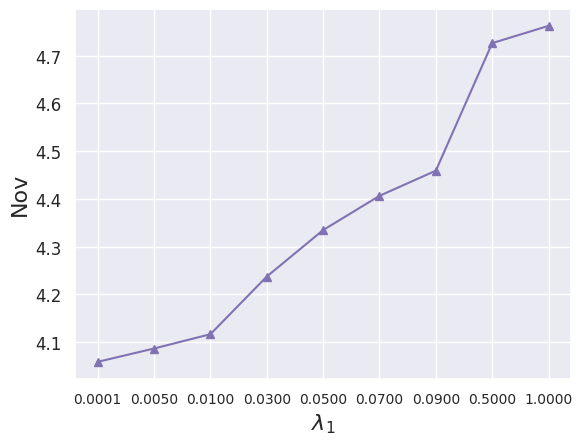

In [ ]:
item_fairness_barplot_ieps(dataset='Gowalla', model='PF')

<Axes: xlabel='Item_EPS', ylabel='Cov_ALL'>

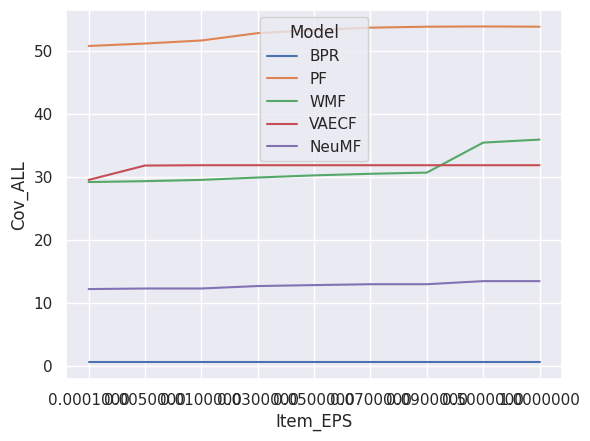

In [ ]:
# lineplot
group_results_df = results_df.groupby('Dataset')
sns.lineplot(data=group_results_df.get_group('Epinion')[group_results_df.get_group('Epinion')['Type'] != 'N'], x="Item_EPS", y="Cov_ALL", hue="Model")

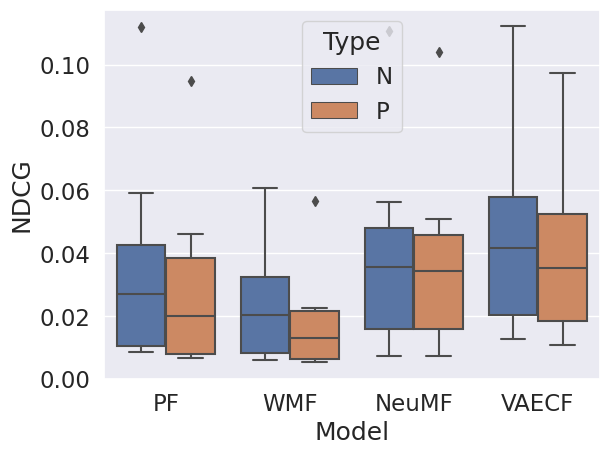

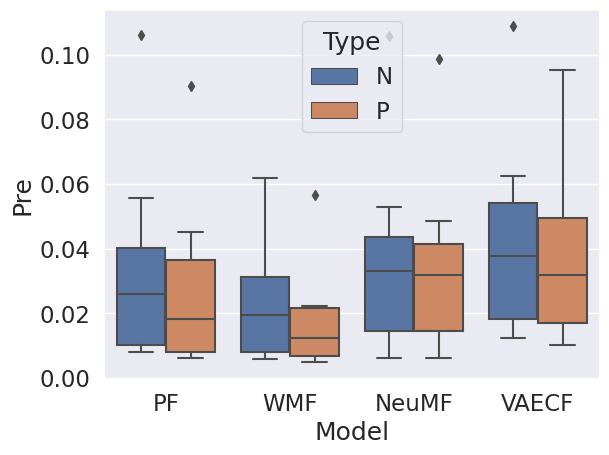

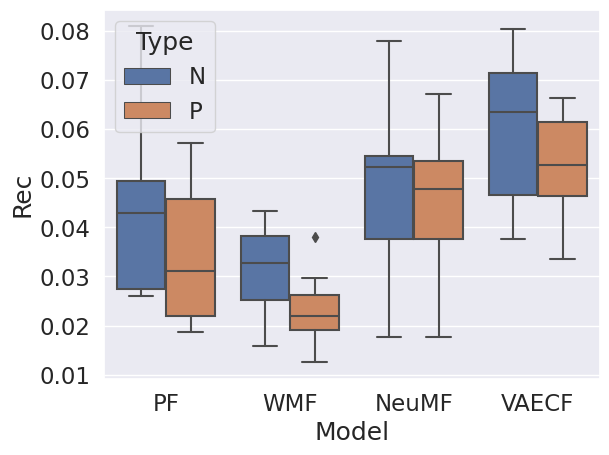

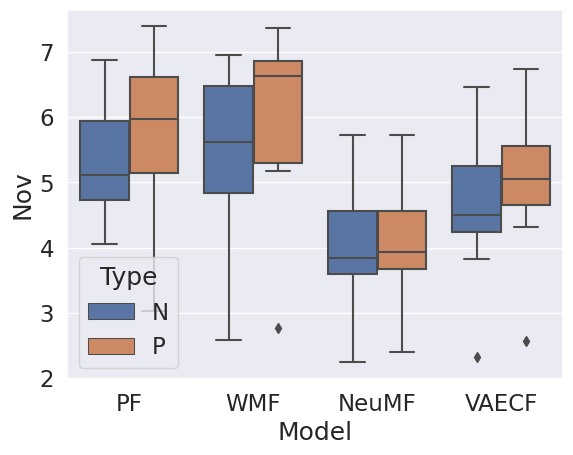

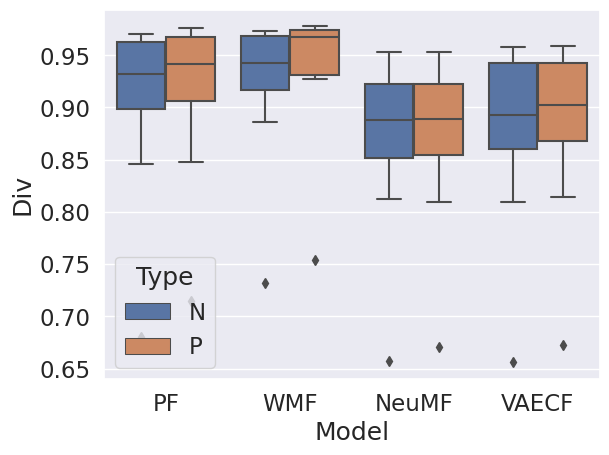

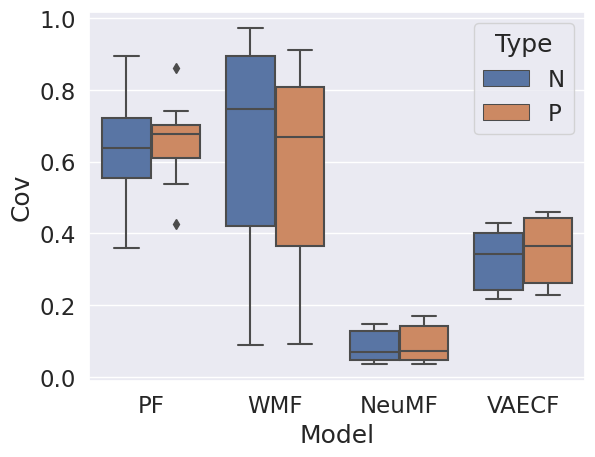

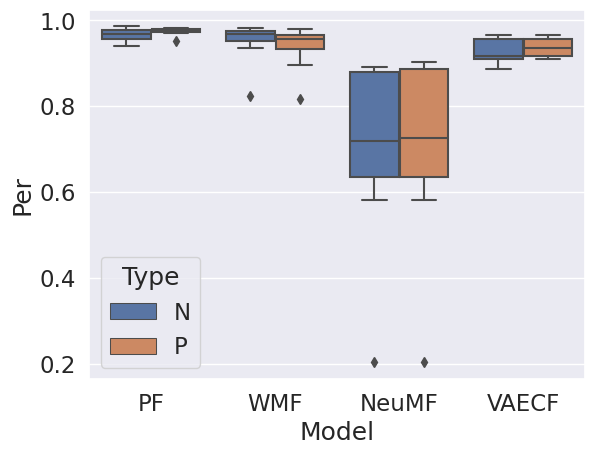

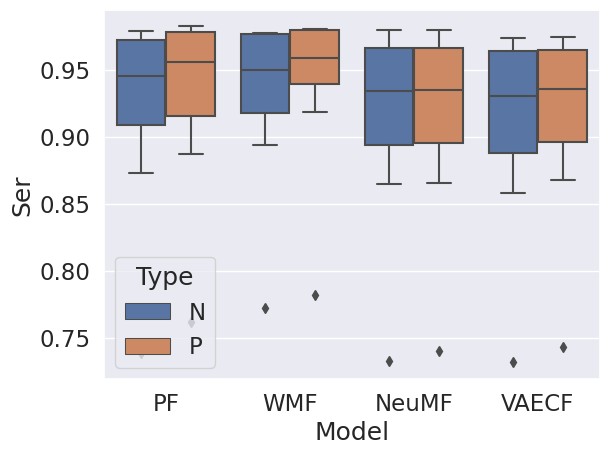

In [15]:
# box plot on eahc metric based on all datasets
for metric in ['NDCG', 'Pre', 'Rec', 'Nov', 'Div', 'Cov', 'Per', 'Ser']:
  fig = plt.figure()
  # Plot using seaborn
  sns.set(font_scale = 1.5)
  sns.boxplot(data=all_final_results_df, x="Model", y=metric, hue="Type")
  fig.savefig(f'boxplot_{metric}.pdf', bbox_inches='tight')